In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib

In [13]:
import plotly.graph_objects as go
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Institut-Zdravotnych-Analyz/covid19-data/main/Hospitals/OpenData_Slovakia_Covid_Hospital_ALL.csv",
    delimiter=";", usecols=["Datum","Kraj","Okres","Nemocnica","KodPZS","Obsadene_covid_lozka","Plucna_vent_lozka","Suspektni_JIS_OAIM","Potvrdeni_JIS_OAIM","hospitalizovany"])


In [3]:
res = df[["Datum", "hospitalizovany"]]

res.to_csv("hospitalizacie.csv", index=False)

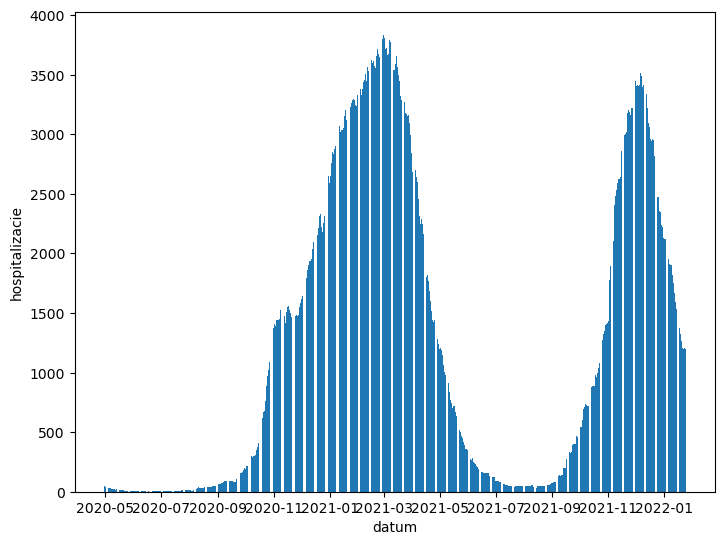

In [4]:
dates = [datetime.strptime(d,"%Y-%m-%d").date() for d in res['Datum']]
hosp = np.array(res["hospitalizovany"])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(dates, hosp)
plt.xlabel("datum")
plt.ylabel("hospitalizacie")
plt.show()

In [5]:
res

,Datum,hospitalizovany
0,2020-04-30,0
1,2020-04-30,0
2,2020-04-30,1
3,2020-04-30,0
4,2020-04-30,0
...,...,...
77423,2022-01-20,1264
77424,2022-01-21,1210
77425,2022-01-22,1201
77426,2022-01-23,1202


In [6]:
modifiedDataFrame = pd.DataFrame(columns=['datum', 'hospitalizovany'])
print(modifiedDataFrame)

Empty DataFrame
Columns: [datum, hospitalizovany]
Index: []


In [7]:
datum = None
hosp = 0
for i in range(len(res)):
    if datum == None:
        datum = res.loc[i, "Datum"]
    if datum != res.loc[i, "Datum"]:
        modifiedDataFrame = modifiedDataFrame.append({'datum': datum, 'hospitalizovany': hosp}, ignore_index=True)
        datum = res.loc[i, "Datum"]
        hosp = 0
    hosp += res.loc[i, "hospitalizovany"]
    if i == len(res)-1:
        modifiedDataFrame = modifiedDataFrame.append({'datum': datum, 'hospitalizovany': hosp}, ignore_index=True)

In [8]:
modifiedDataFrame

,datum,hospitalizovany
0,2020-04-30,51
1,2020-05-01,43
2,2020-05-02,41
3,2020-05-03,42
4,2020-05-04,38
...,...,...
1265,2022-01-20,1264
1266,2022-01-21,1210
1267,2022-01-22,1201
1268,2022-01-23,1202


In [9]:
sortdf = modifiedDataFrame.sort_values(by=['datum'])

In [10]:
sortdf

,datum,hospitalizovany
0,2020-04-30,51
635,2020-04-30,51
636,2020-05-01,43
1,2020-05-01,43
2,2020-05-02,41
...,...,...
632,2022-01-22,1201
1268,2022-01-23,1202
633,2022-01-23,1202
634,2022-01-24,1200


In [12]:
sortdf.drop_duplicates()

,datum,hospitalizovany
0,2020-04-30,51
636,2020-05-01,43
2,2020-05-02,41
3,2020-05-03,42
4,2020-05-04,38
...,...,...
1265,2022-01-20,1264
1266,2022-01-21,1210
1267,2022-01-22,1201
1268,2022-01-23,1202


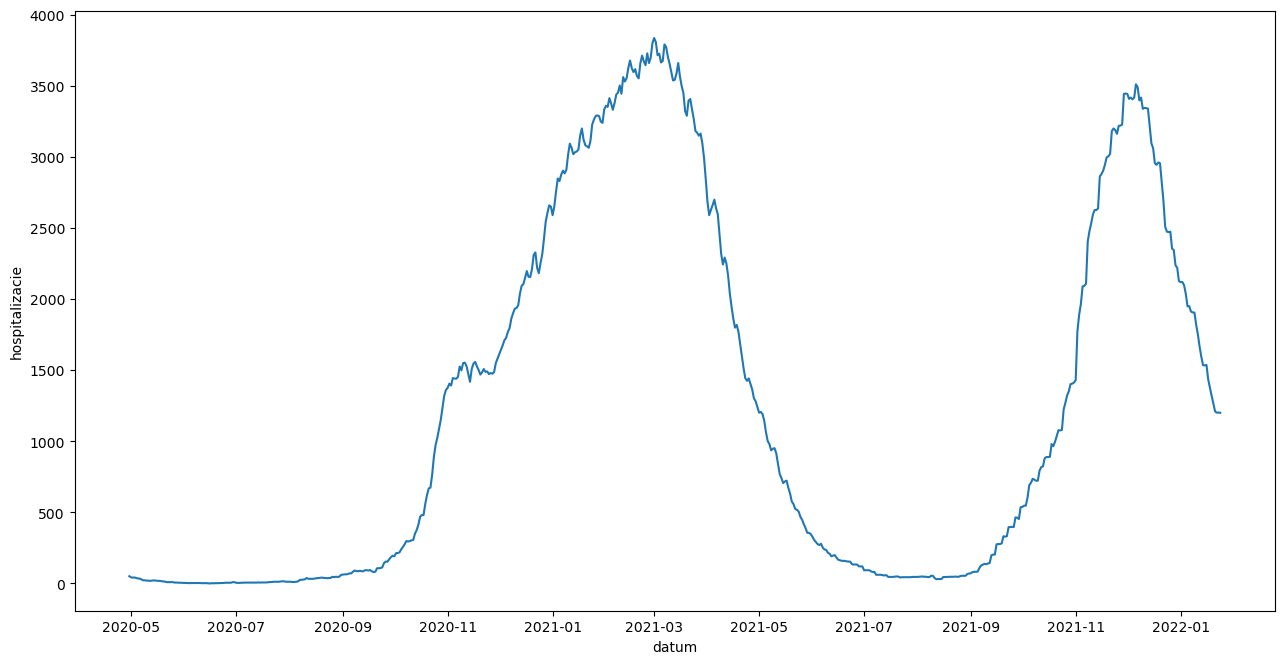

In [20]:
dates = [datetime.strptime(d,"%Y-%m-%d").date() for d in sortdf['datum']]
hosp = np.array(sortdf["hospitalizovany"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.plot(dates, hosp)
plt.xlabel("datum")
plt.ylabel("hospitalizacie")
plt.show()

In [49]:
dates = [datetime.strptime(d,"%Y-%m-%d").date() for d in sortdf['datum']]
hosp = np.array(sortdf['hospitalizovany'].rolling(7).mean().round(2))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.plot(dates, hosp)
plt.title("Graf celkových hospitalizácii")
plt.xlabel("Dátum")
plt.ylabel("Počet")

plt.legend()
fig.tight_layout()
fig.savefig('comparison.png', dpi=200) 

#plt.show()

No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if sys.path[0] == '':


In [58]:
fig = plt.figure(figsize=(12, 6))
plt.plot(dates, hosp)
plt.title("Graf celkových hospitalizácii")
plt.xlabel('Dátum')
plt.ylabel('Počet')
plt.legend()
#fig.tight_layout()
fig.savefig('comparison.png') 

No handles with labels found to put in legend.
